In [1]:
!cd .. && mkdir build
!cd ../../build/ && rm -rf *
!cd ../../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification is GNU 9.3.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /home/rociodcasco/miniconda3/envs/tp2/bin/python (found version "3.6.5") 
-- Found PythonLibs: /home/rociodcasco/miniconda3/envs/tp2/lib/libpython3.6m.so
-- pybind11 v2.2.4
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/mnt/c/Users/Rocío/Documents/GitHub/metnum_

In [2]:
# verifico version de python e importo metnum
!pwd
!python --version

import sys
import os

p = os.path.abspath('../')
sys.path.insert(1, p)

import metnum

/mnt/c/Users/Rocío/Documents/GitHub/metnum_tp2/notebooks/aber
Python 3.6.5 :: Anaconda, Inc.


In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd

#Extraer dataset
df_train = pd.read_csv("../../data/train.csv")

# shuffle
df_train = df_train.sample(frac = 1)


In [4]:
def predict(X_train, y_train, X_val, alpha, k, con_pca):
    
    clf = metnum.KNNClassifier(k)
    
    if con_pca:
        
        pca = metnum.PCA(alpha)
        pca.fit(X_train)
        
        X_train = pca.transform(X_train)
        X_val = pca.transform(X_val)
        
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    
    return y_pred

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time

acc_pred = []
prec_pred = []
recall_pred = []
total = len(df_train)

distrNum = []

durationPerIteration = []


#por porcentajes
cantidadImg = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

aber = [0,1,2,3,4,5,6,7,8,9]

totalTimeSt = time.time()
for i in cantidadImg:
    print(f"aber: {i}")
    #Corto la muestra
    sample = df_train[:int(i*total)]
    
    # Uso values para mandar todo a arrays de numpy
    X = sample[sample.columns[1:]].values
    y = sample["label"].values.reshape(-1, 1)
    
    #for fun: porcentajes de cada numero en la muestra
    distrNum.append(sample["label"].value_counts(normalize=True))
    
    #Separo train de validacion
    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]
    
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    #kNN con alpha y k optimos _en teoria_ y con PCA
    start = time.time()
    y_pred = predict(X_train, y_train, X_val, 40, 5, True)
    finish = time.time()
    
    #guardo las metricas
    acc = accuracy_score(y_val, y_pred)
    acc_pred.append(acc)
    
    prec = precision_score(y_val, y_pred, average='micro')
    #prec = precision_score(y_val, y_pred, average='micro')
    prec_pred.append(prec)
    
    recall = recall_score(y_val, y_pred, average='micro')
    #recall = recall_score(y_val, y_pred, average='micro')
    recall_pred.append(recall)
    
    #guardo el tiempo
    totalTime = finish-start
    durationPerIteration.append(totalTime)
    print(f"El tiempo de ejecución es: {totalTime}")
    
totalTimeF = time.time()

print(f"Tiempo total de ejecucion: {totalTimeF - totalTimeSt}")

aber: 0.1
Ahora tengo 3360 instancias de entrenamiento y 840 de validación
El tiempo de ejecución es: 0.8389084339141846
aber: 0.2
Ahora tengo 6720 instancias de entrenamiento y 1680 de validación
El tiempo de ejecución es: 1.0294883251190186
aber: 0.3
Ahora tengo 10080 instancias de entrenamiento y 2520 de validación
El tiempo de ejecución es: 2.18219256401062
aber: 0.4
Ahora tengo 13440 instancias de entrenamiento y 3360 de validación
El tiempo de ejecución es: 3.375096559524536
aber: 0.5
Ahora tengo 16800 instancias de entrenamiento y 4200 de validación
El tiempo de ejecución es: 3.9979803562164307
aber: 0.6
Ahora tengo 20160 instancias de entrenamiento y 5040 de validación
El tiempo de ejecución es: 5.3873817920684814
aber: 0.7
Ahora tengo 23519 instancias de entrenamiento y 5880 de validación
El tiempo de ejecución es: 7.407848358154297
aber: 0.8
Ahora tengo 26880 instancias de entrenamiento y 6720 de validación
El tiempo de ejecución es: 8.909593105316162
aber: 0.9
Ahora tengo 30

In [6]:
print(prec_pred[1])
print(recall_pred[1])

0.9285714285714286
0.9285714285714286


In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time

acc_pred30 = []
prec_pred30 = []
recall_pred30 = []
total = len(df_train)

durationPerIteration30 = []


totalTimeSt = time.time()
for i in cantidadImg:
    print(f"aber: {i}")
    #Corto la muestra
    sample = df_train[:int(i*total)]
    
    # Uso values para mandar todo a arrays de numpy
    X = sample[sample.columns[1:]].values
    y = sample["label"].values.reshape(-1, 1)
    
    #Separo train de validacion
    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]
    
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    #kNN con alpha y k optimos _en teoria_ y con PCA
    start = time.time()
    y_pred = predict(X_train, y_train, X_val, 30, 5, True)
    finish = time.time()
    
    #guardo las metricas
    acc = accuracy_score(y_val, y_pred)
    acc_pred30.append(acc)
    
    prec = precision_score(y_val, y_pred, average='micro')
    prec_pred30.append(prec)
    
    recall = recall_score(y_val, y_pred, average='micro')
    recall_pred30.append(recall)
    
    #guardo el tiempo
    totalTime = finish-start
    durationPerIteration30.append(totalTime)
    print(f"El tiempo de ejecución es: {totalTime}")
    
totalTimeF = time.time()

print(f"Tiempo total de ejecucion: {totalTimeF - totalTimeSt}")

aber: 0.1
Ahora tengo 3360 instancias de entrenamiento y 840 de validación
El tiempo de ejecución es: 0.3823506832122803
aber: 0.2
Ahora tengo 6720 instancias de entrenamiento y 1680 de validación
El tiempo de ejecución es: 1.0047848224639893
aber: 0.3
Ahora tengo 10080 instancias de entrenamiento y 2520 de validación
El tiempo de ejecución es: 1.7128143310546875
aber: 0.4
Ahora tengo 13440 instancias de entrenamiento y 3360 de validación
El tiempo de ejecución es: 2.739212989807129
aber: 0.5
Ahora tengo 16800 instancias de entrenamiento y 4200 de validación
El tiempo de ejecución es: 3.7436203956604004
aber: 0.6
Ahora tengo 20160 instancias de entrenamiento y 5040 de validación
El tiempo de ejecución es: 5.539964914321899
aber: 0.7
Ahora tengo 23519 instancias de entrenamiento y 5880 de validación
El tiempo de ejecución es: 7.083415508270264
aber: 0.8
Ahora tengo 26880 instancias de entrenamiento y 6720 de validación
El tiempo de ejecución es: 8.377580165863037
aber: 0.9
Ahora tengo 3

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import time

acc_pred50 = []
prec_pred50 = []
recall_pred50 = []
total = len(df_train)

durationPerIteration50 = []


totalTimeSt = time.time()
for i in cantidadImg:
    print(f"aber: {i}")
    #Corto la muestra
    sample = df_train[:int(i*total)]
    
    # Uso values para mandar todo a arrays de numpy
    X = sample[sample.columns[1:]].values
    y = sample["label"].values.reshape(-1, 1)
    
    #Separo train de validacion
    limit = int(0.8 * X.shape[0]) 

    X_train, y_train = X[:limit], y[:limit]
    X_val, y_val = X[limit:], y[limit:]
    
    assert len(X_train) == len(y_train)
    assert len(X_val) == len(y_val)
    
    print(f"Ahora tengo {len(X_train)} instancias de entrenamiento y {len(X_val)} de validación")
    
    #kNN con alpha y k optimos _en teoria_ y con PCA
    start = time.time()
    y_pred = predict(X_train, y_train, X_val, 50, 5, True)
    finish = time.time()
    
    #guardo las metricas
    acc = accuracy_score(y_val, y_pred)
    acc_pred50.append(acc)
    
    prec = precision_score(y_val, y_pred, average='micro')
    prec_pred50.append(prec)
    
    recall = recall_score(y_val, y_pred, average='micro')
    recall_pred50.append(recall)
    
    #guardo el tiempo
    totalTime = finish-start
    durationPerIteration50.append(totalTime)
    print(f"El tiempo de ejecución es: {totalTime}")
    
totalTimeF = time.time()

print(f"Tiempo total de ejecucion: {totalTimeF - totalTimeSt}")

aber: 0.1
Ahora tengo 3360 instancias de entrenamiento y 840 de validación
El tiempo de ejecución es: 0.44660258293151855
aber: 0.2
Ahora tengo 6720 instancias de entrenamiento y 1680 de validación
El tiempo de ejecución es: 2.1371188163757324
aber: 0.3
Ahora tengo 10080 instancias de entrenamiento y 2520 de validación
El tiempo de ejecución es: 2.819096088409424
aber: 0.4
Ahora tengo 13440 instancias de entrenamiento y 3360 de validación
El tiempo de ejecución es: 3.470703363418579
aber: 0.5
Ahora tengo 16800 instancias de entrenamiento y 4200 de validación
El tiempo de ejecución es: 5.081132173538208
aber: 0.6
Ahora tengo 20160 instancias de entrenamiento y 5040 de validación
El tiempo de ejecución es: 5.838651657104492
aber: 0.7
Ahora tengo 23519 instancias de entrenamiento y 5880 de validación
El tiempo de ejecución es: 7.940558671951294
aber: 0.8
Ahora tengo 26880 instancias de entrenamiento y 6720 de validación
El tiempo de ejecución es: 10.119544506072998
aber: 0.9
Ahora tengo 3

[0.9083333333333333, 0.9285714285714286, 0.946031746031746, 0.9458333333333333, 0.9492857142857143, 0.9464285714285714, 0.9540816326530612, 0.9541666666666667, 0.9523809523809523, 0.9620238095238095]
[0.9083333333333333, 0.9285714285714286, 0.946031746031746, 0.9458333333333333, 0.9492857142857143, 0.9464285714285714, 0.9540816326530612, 0.9541666666666667, 0.9523809523809523, 0.9620238095238095]
[0.9083333333333333, 0.9285714285714286, 0.946031746031746, 0.9458333333333333, 0.9492857142857143, 0.9464285714285714, 0.9540816326530612, 0.9541666666666667, 0.9523809523809523, 0.9620238095238095]


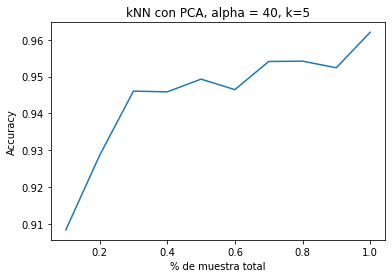

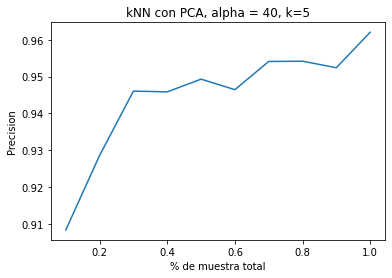

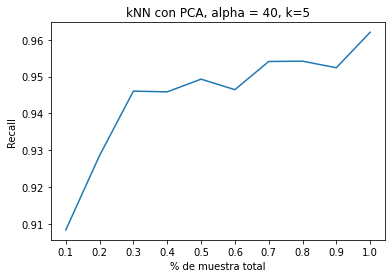

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

fig, ax = plt.subplots()
ax.plot(cantidadImg, acc_pred)
ax.set(xlabel='% de muestra total', ylabel='Accuracy',
       title='kNN con PCA, alpha = 40, k=5')

fig, bx = plt.subplots()
bx.plot(cantidadImg, prec_pred)
bx.set(xlabel='% de muestra total', ylabel='Precision',
       title='kNN con PCA, alpha = 40, k=5')

fig, cx = plt.subplots()
cx.plot(cantidadImg, recall_pred)
cx.set(xlabel='% de muestra total', ylabel='Recall',
       title='kNN con PCA, alpha = 40, k=5')

print(acc_pred)
print(prec_pred)
print(recall_pred)

plt.xticks(cantidadImg)

plt.show()

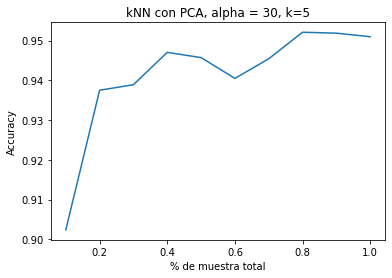

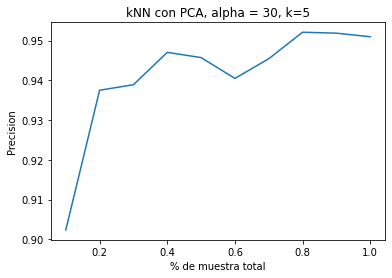

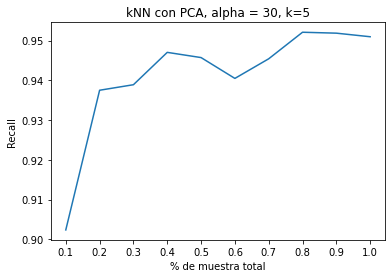

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

fig, ax = plt.subplots()
ax.plot(cantidadImg, acc_pred30)
ax.set(xlabel='% de muestra total', ylabel='Accuracy',
       title='kNN con PCA, alpha = 30, k=5')

fig, bx = plt.subplots()
bx.plot(cantidadImg, prec_pred30)
bx.set(xlabel='% de muestra total', ylabel='Precision',
       title='kNN con PCA, alpha = 30, k=5')

fig, cx = plt.subplots()
cx.plot(cantidadImg, recall_pred30)
cx.set(xlabel='% de muestra total', ylabel='Recall',
       title='kNN con PCA, alpha = 30, k=5')

plt.xticks(cantidadImg)

plt.show()

[0.9130952380952381, 0.9363095238095238, 0.9456349206349206, 0.9479166666666666, 0.9478571428571428, 0.9494047619047619, 0.9503401360544218, 0.9549107142857143, 0.9574074074074074, 0.9529761904761904]
[0.9130952380952381, 0.9363095238095238, 0.9456349206349206, 0.9479166666666666, 0.9478571428571428, 0.9494047619047619, 0.9503401360544218, 0.9549107142857143, 0.9574074074074074, 0.9529761904761904]
[0.9130952380952381, 0.9363095238095238, 0.9456349206349206, 0.9479166666666666, 0.9478571428571428, 0.9494047619047619, 0.9503401360544218, 0.9549107142857143, 0.9574074074074074, 0.9529761904761904]


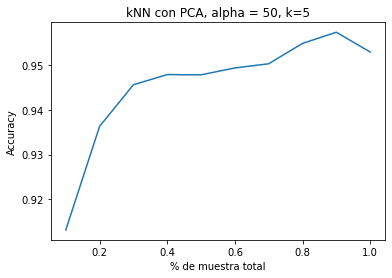

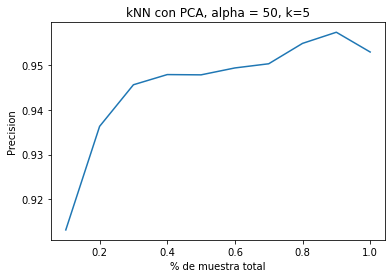

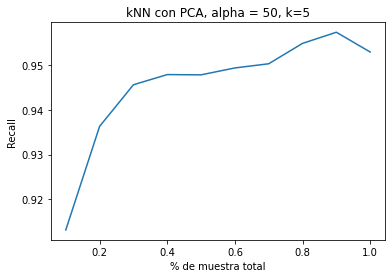

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting

fig, ax = plt.subplots()
ax.plot(cantidadImg, acc_pred50)

ax.set(xlabel='% de muestra total', ylabel='Accuracy',
       title='kNN con PCA, alpha = 50, k=5')

fig, bx = plt.subplots()
bx.plot(cantidadImg, prec_pred50)
bx.set(xlabel='% de muestra total', ylabel='Precision',
       title='kNN con PCA, alpha = 50, k=5')

fig, cx = plt.subplots()
cx.plot(cantidadImg, recall_pred50)
cx.set(xlabel='% de muestra total', ylabel='Recall',
       title='kNN con PCA, alpha = 50, k=5')

print(acc_pred50)
print(prec_pred50)
print(recall_pred50)
plt.show()